### Simple calculations for analytics

## generated data only for 19 days, I know that for a real analysis you need at least half a year or a year

In [39]:
import mysql.connector  # or import pymysql
import pandas as pd

#Database connection parameters
db_config = {
    "host": "192.168.1.164",  # Specify your host
    "user": "#######",           # Specify your username
    "password": "######",  # Specify your password
    "database": "raw_data"      # Specify your database name
}

#Connecting to MySQL database
connection = mysql.connector.connect(**db_config)  # or pymysql.connect(**db_config)

#SQL query to retrieve data
query = "SELECT * FROM raw_data.dpi_sessions;"  # Name of your table

#Reading data into a DataFrame
df = pd.read_sql(query, connection)

#Closing the connection
connection.close()

#Displaying the first 5 rows of the DataFrame
print(df.head())


C:\Users\erkin\AppData\Local\Temp\ipykernel_7236\797297092.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


   session_id          start_time            end_time  base_station_id  \
0           1 2025-01-16 12:29:35 2025-02-28 18:10:25              685   
1           2 2025-01-18 00:50:23 2026-01-16 19:05:35               78   
2           3 2025-01-19 03:10:01 2025-09-03 03:54:11              818   
3           4 2025-01-12 00:18:47 2025-01-13 06:33:41              539   
4           5 2025-01-05 00:11:36 2025-04-17 22:42:00              732   

    latitude   longitude          user_ip   destination_ip          domain  \
0  28.815873  -78.978584    47.172.78.228    70.143.71.233     walmart.com   
1  44.665145 -109.830670   200.175.62.248  203.169.212.190  applestore.com   
2  31.200968  -83.236699  171.152.252.114   136.218.109.97     walmart.com   
3  30.049574  -80.008818   197.13.181.219  194.108.246.245  shop.apple.com   
4  34.101854 -114.795900   192.189.138.88    2.205.250.139  applestore.com   

  protocol  ...  browser                                         user_agent  \
0    HT

#### A Retention Rate of 1.93% indicates that only a small fraction of users are returning after their initial interaction with the service or platform.

In [3]:
# Convert start_time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Find the first session date for each user
first_session_date = df.groupby('user_id')['start_time'].min()

# Merge the first session date with the original data
first_sessions = pd.merge(df, first_session_date, on='user_id', suffixes=('', '_first'))

# Filter users who returned after 7 days of their first session
returned_users = first_sessions[first_sessions['start_time'] > first_sessions['start_time_first'] + pd.Timedelta(days=7)]

# Calculate the retention rate
retention_rate = len(returned_users) / len(first_sessions) * 100

print(f"Retention Rate: {retention_rate}%")

Retention Rate: 1.9269999999999998%


### there is little data : A Churn Rate of 98.07% means that a very high percentage of users (98.07%) have stopped engaging with the service after their first interaction during the observed period.

In [12]:
# Churn Rate is simply the complement of the retention rate
churn_rate = 100 - retention_rate
print(f"Churn Rate: {churn_rate}%")

Churn Rate: 98.073%


In [14]:
# Filter sessions where users interacted with a specific content (e.g., "streaming" category)
conversion_sessions = df[df['category'] == 'streaming']

# Calculate conversion rate
conversion_rate = len(conversion_sessions) / len(df) * 100

print(f"Conversion Rate: {conversion_rate}%")

Conversion Rate: 14.304%


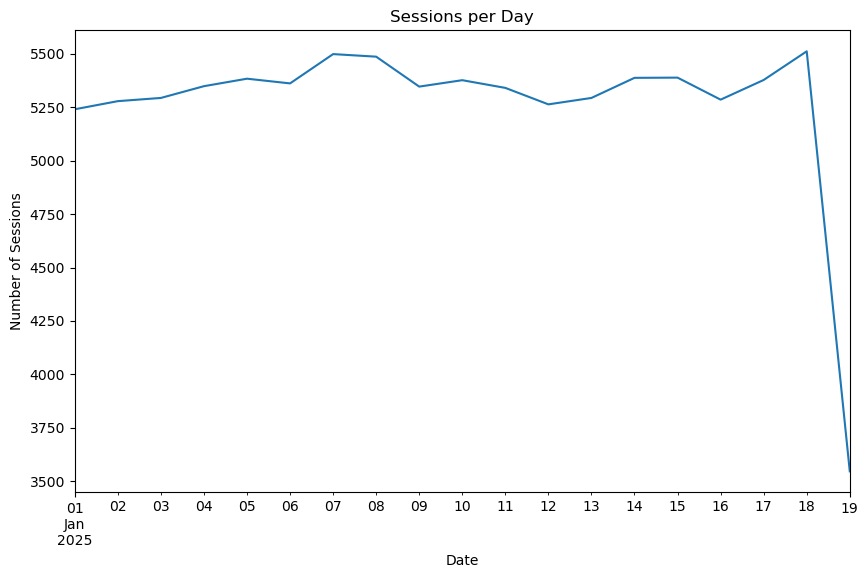

In [16]:
import matplotlib.pyplot as plt

# Resample the data to get the number of sessions per day
df['start_time'] = pd.to_datetime(df['start_time'])
df.set_index('start_time', inplace=True)
daily_sessions = df.resample('D').size()

# Plot the time series for session count
plt.figure(figsize=(10,6))
daily_sessions.plot()
plt.title("Sessions per Day")
plt.xlabel("Date")
plt.ylabel("Number of Sessions")
plt.show()

In [18]:
df

,session_id,end_time,base_station_id,latitude,longitude,user_ip,destination_ip,domain,protocol,port,...,browser,user_agent,application_name,content_type,risk_category,category,is_vpn,connection_type,throttled,error_code
start_time,,,,,,,,,,,,,,,,,,,,,
2025-01-16 12:29:35,1,2025-02-28 18:10:25,685,28.815873,-78.978584,47.172.78.228,70.143.71.233,walmart.com,HTTPS,53,...,Edge,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_6_6; r...,Facebook,image,malicious,technical,1,4G,1,500.0
2025-01-18 00:50:23,2,2026-01-16 19:05:35,78,44.665145,-109.830670,200.175.62.248,203.169.212.190,applestore.com,HTTP,8080,...,Chrome,Mozilla/5.0 (compatible; MSIE 6.0; Windows CE;...,WhatsApp,text,suspicious,electronics,1,5G,1,NaN
2025-01-19 03:10:01,3,2025-09-03 03:54:11,818,31.200968,-83.236699,171.152.252.114,136.218.109.97,walmart.com,HTTP,443,...,Edge,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,WhatsApp,image,malicious,electronics,1,4G,0,404.0
2025-01-12 00:18:47,4,2025-01-13 06:33:41,539,30.049574,-80.008818,197.13.181.219,194.108.246.245,shop.apple.com,HTTP,8080,...,Chrome,Opera/9.80.(X11; Linux i686; sd-IN) Presto/2.9...,YouTube,image,safe,furniture,1,5G,0,NaN
2025-01-05 00:11:36,5,2025-04-17 22:42:00,732,34.101854,-114.795900,192.189.138.88,2.205.250.139,applestore.com,HTTPS,443,...,Edge,Mozilla/5.0 (X11; Linux i686) AppleWebKit/531....,YouTube,text,malicious,furniture,0,Wi-Fi,0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-15 21:36:35,99996,2025-08-20 05:25:09,840,38.603629,-91.961239,201.21.236.214,188.78.60.107,samsungstore.com,HTTPS,53,...,Safari,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,YouTube,image,malicious,gaming,0,4G,1,404.0
2025-01-15 16:01:48,99997,2025-02-06 14:57:25,769,46.211561,-77.775233,62.39.87.104,223.135.42.98,lowes.com,HTTP,80,...,Firefox,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,WhatsApp,image,suspicious,streaming,1,Wi-Fi,1,200.0
2025-01-03 00:14:06,99998,2025-11-24 22:01:00,759,42.869412,-91.455484,211.55.221.40,154.239.25.175,ebay.com,HTTP,443,...,Safari,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_0 like M...,Facebook,video,malicious,streaming,1,Wi-Fi,1,200.0


### I know that for cohort analysis this is crap) the best is with a cumulative effect, in general, a cohort is to identify people with the shortest date and look at these people on other days how they behaved

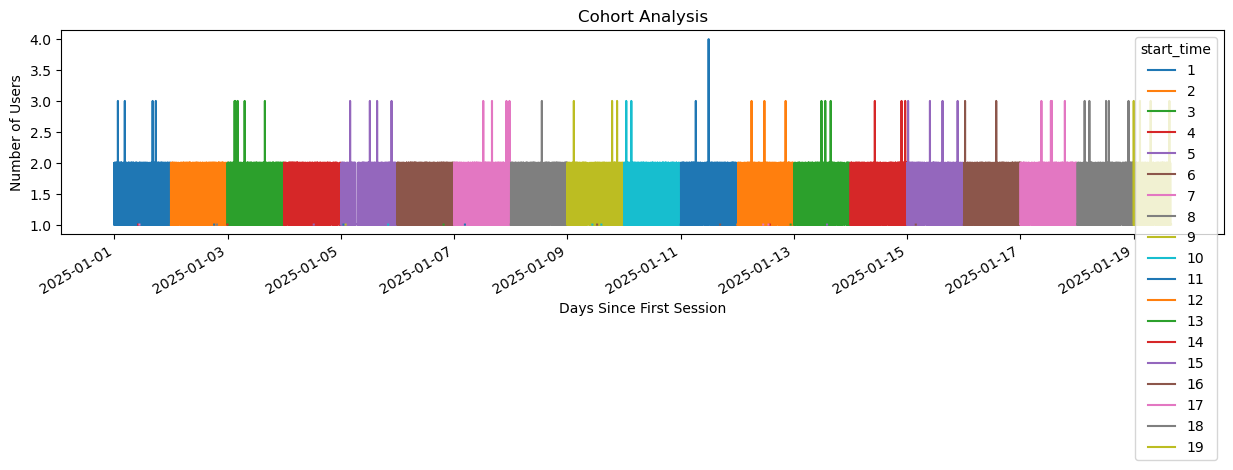

In [32]:
# Group users into cohorts based on their first session date
df['cohort'] = df.groupby('user_id')['start_time'].transform('min')

# For each cohort, calculate the number of users returning on subsequent days
cohort_analysis = df.groupby(['cohort', df['start_time'].dt.day])['user_id'].nunique().unstack()

# Plot cohort analysis
cohort_analysis.plot(figsize=(15,3))
plt.title("Cohort Analysis")
plt.xlabel("Days Since First Session")
plt.ylabel("Number of Users")
plt.show()

In [17]:
#!pip3 install fbprophet

In [26]:
# Calculate net premium based on traffic volume (you could also account for other metrics such as costs)
df['net_premium'] = df['traffic_volume'] * 0.01  # Example: 1 cent per byte of traffic

# Sum the net premium for all sessions
total_net_premium = df['net_premium'].sum()

print(f"Total Net Premium: ${total_net_premium}")


Total Net Premium: $4997462977.44


In [28]:
# Calculate losses and revenue (this is an example based on some assumptions)
losses = df[df['risk_category'] == 'malicious']['traffic_volume'].sum()
revenue = df['traffic_volume'].sum()

# Calculate loss ratio
loss_ratio = losses / revenue * 100

print(f"Loss Ratio: {loss_ratio}%")

Loss Ratio: 33.284697384033215%


### ARPU (Average Revenue Per User) is quite high at 5.25 million, which suggests that each user generates significant traffic. 
Customer Lifetime is very short, around 13.5 hours on average, which implies users don’t stay active for long. 
LTV (Customer Lifetime Value) is around 2.95 million, which is low due to the short customer lifetime, despite the high ARPU.

In [41]:
df['start_time'] = pd.to_datetime(df['start_time'])

# 1. Calculate total traffic volume for each user
user_revenue = df.groupby('user_id')['traffic_volume'].sum().reset_index()
user_revenue.rename(columns={'traffic_volume': 'total_revenue'}, inplace=True)

# 2. Define user lifetime (difference between first and last session)
df['first_session'] = df.groupby('user_id')['start_time'].transform('min')
df['last_session'] = df.groupby('user_id')['start_time'].transform('max')
df['lifetime'] = (df['last_session'] - df['first_session']).dt.days

# 3. Calculate Average Revenue Per User (ARPU)
arpu = user_revenue['total_revenue'].mean()  # Average traffic volume per user

# 4. Average customer lifetime (in days)
average_lifetime = df['lifetime'].mean()  # Average customer lifetime in days

# 5. Calculate LTV (LTV = ARPU * Average Lifetime)
ltv = arpu * average_lifetime

# Print the results
print(f"Average Revenue Per User (ARPU): {arpu}")
print(f"Average Customer Lifetime (Lifetime): {average_lifetime} days")
print(f"Customer Lifetime Value (LTV): {ltv}")

Average Revenue Per User (ARPU): 5254071.846419109
Average Customer Lifetime (Lifetime): 0.56129 days
Customer Lifetime Value (LTV): 2949057.9866765817
